<a href="https://colab.research.google.com/github/antoniogss/air_quality/blob/main/graphs_inmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook imports and packages

In [ ]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files #Upload files into the notebook
from glob import glob
from datetime import date, time, datetime, timedelta
from functools import reduce
from matplotlib import dates, rcParams
from scipy.stats import linregress
from sklearn import linear_model

war.filterwarnings('ignore')

#Google Drive connection

In [ ]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

#Load the csv file into a DF

In [ ]:
%cd ./gdrive/MyDrive/air_quality/datasets/created_datasets/

dir = '/content/gdrive/MyDrive/air_quality/images/'

/content/gdrive/MyDrive/air_quality/datasets/created_datasets


##Daily

In [ ]:
inmet_dia = pd.read_csv("./inmet_dia.csv")

# Drop first column of dataframe
inmet_dia = inmet_dia.iloc[: , 1:]

inmet_dia['data'] = pd.to_datetime(inmet_dia['data'])

##Monthly

In [ ]:
inmet_mes = pd.read_csv("./inmet_mes.csv")

# Drop first column of dataframe
inmet_mes = inmet_mes.iloc[: , 1:]

inmet_mes['data'] = pd.to_datetime(inmet_mes['data'])

#Graphs

##Daily

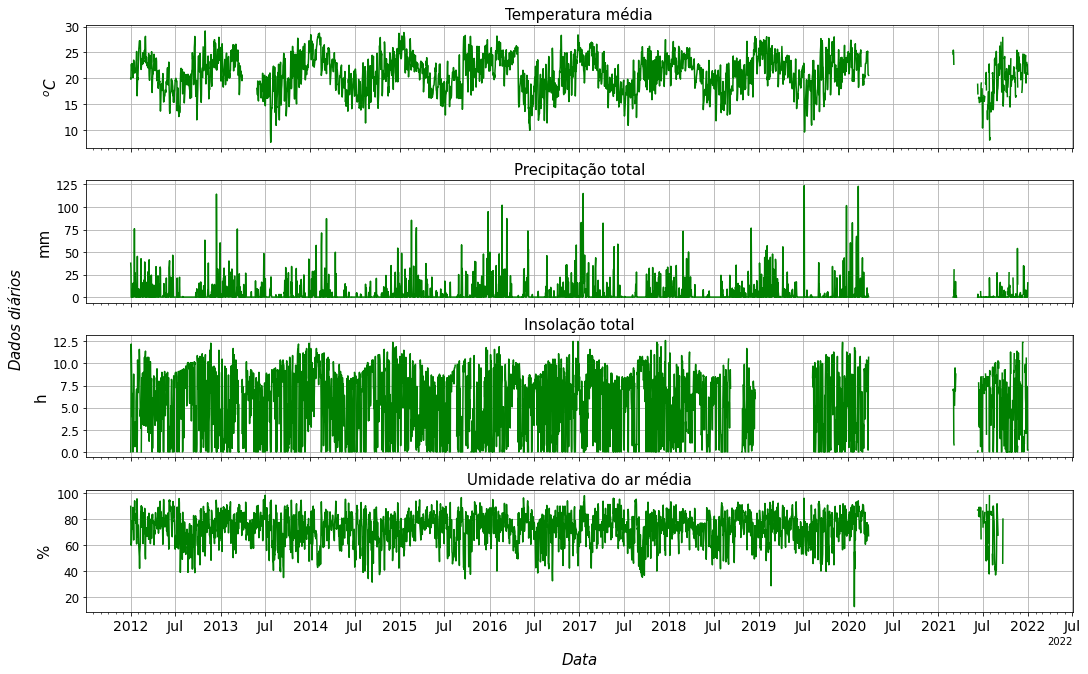

In [ ]:
#@title
x = inmet_dia['data']

y1 = inmet_dia['temp_med']
y2 = inmet_dia['ppt_total']
y3 = inmet_dia['insolacao_total']
y4 = inmet_dia['umid_rel_med']
y5 = inmet_dia['vel_vento_med']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                          ncols=1, 
                                          sharex=True,
                                          # sharey=True, 
                                          figsize=(16,10)
                                          )

####

ax1.plot(x, y1, label='temp_med', color='green')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

# ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax1.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax1.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x, y2, label='ppt_total', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

# ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax2.xaxis.get_major_locator())) 

for label in ax2.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x, y3, label='insolacao_total', color='green')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

# ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax3.xaxis.get_major_locator())) 

for label in ax3.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x, y4, label='umid_rel_med', color='green')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

# ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax4.xaxis.get_major_locator())) 

for label in ax4.get_xticklabels(which='major'):

    label.set(horizontalalignment='center')

###

# ax1.legend()
ax1.set_title('Temperatura média',fontsize=15)
ax1.set_ylabel('$^{o}C$',fontsize=15)
ax1.grid(True)

# ax2.legend()
ax2.set_title('Precipitação total',fontsize=15)
ax2.set_ylabel('mm',fontsize=15)
ax2.grid(True)

# ax3.legend()
ax3.set_title('Insolação total',fontsize=15)
ax3.set_ylabel('h',fontsize=15)
ax3.grid(True)

# ax4.legend()
ax4.set_title('Umidade relativa do ar média',fontsize=15)
ax4.set_ylabel('%',fontsize=15)
ax4.grid(True)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', 
                which='both', 
                top=False, 
                bottom=False, 
                left=False, 
                right=False)

plt.xlabel("\n$Data$",fontsize=15)
plt.ylabel("$Dados\;diários$\n\n",fontsize=15)

plt.setp(ax4.get_xticklabels(), 
         fontsize=14
        )

plt.setp([ax1.get_yticklabels(),
          ax2.get_yticklabels(),
          ax3.get_yticklabels(),
          ax4.get_yticklabels()], 
         fontsize=12
         )


plt.tight_layout()

plt.savefig(
              dir + 'meteorologia_dia.jpg',
              transparent = True,
              bbox_inches = 'tight',
              dpi = 500              
            )

plt.show()

##Monthly

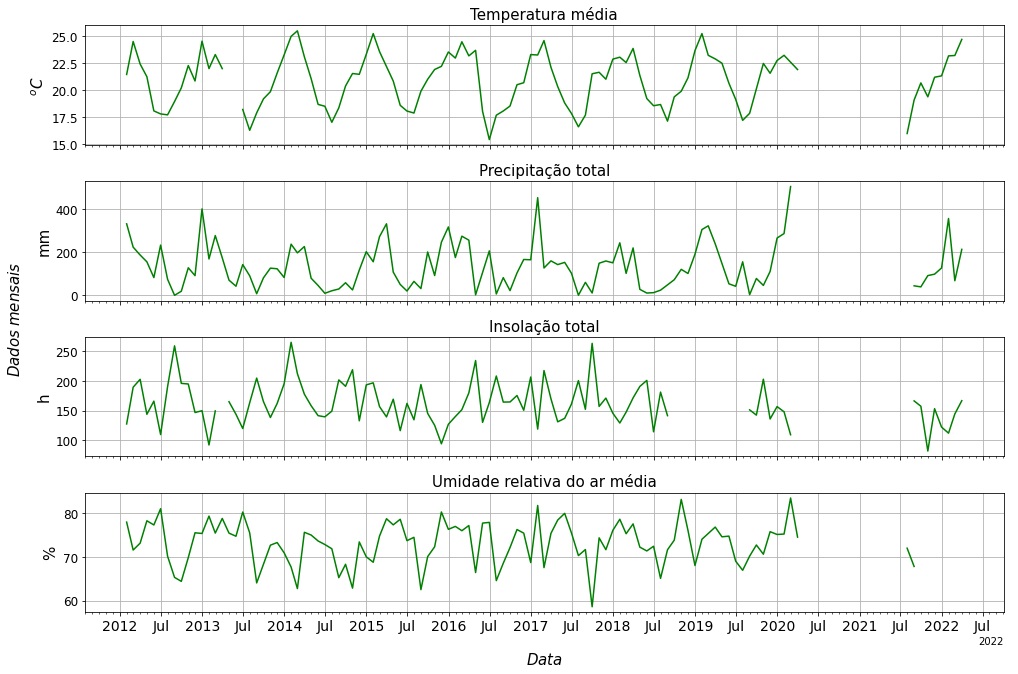

In [ ]:
#@title
x = inmet_mes['data']

y1 = inmet_mes['temp_med']
y2 = inmet_mes['ppt_total']
y3 = inmet_mes['insolacao_total']
y4 = inmet_mes['umid_rel_med']
y5 = inmet_mes['vel_vento_med']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, 
                                          ncols=1, 
                                          sharex=True,
                                          # sharey=True, 
                                          figsize=(15,10)
                                        )

####

ax1.plot(x, y1, label='temp_med', color='green')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

# ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax1.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax1.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(x, y2, label='ppt_total', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

# ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax2.xaxis.get_major_locator())) 

for label in ax2.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax3.plot(x, y3, label='insolacao_total', color='green')

ax3.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax3.xaxis.set_minor_locator(dates.MonthLocator())

# ax3.grid(True)

ax3.set_ylabel(r'')

ax3.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax3.xaxis.get_major_locator())) 

for label in ax3.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax4.plot(x, y4, label='umid_rel_med', color='green')

ax4.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax4.xaxis.set_minor_locator(dates.MonthLocator())

# ax4.grid(True)

ax4.set_ylabel(r'')

ax4.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax4.xaxis.get_major_locator())) 

for label in ax4.get_xticklabels(which='major'):

    label.set(horizontalalignment='center')

###

# ax1.legend()
ax1.set_title('Temperatura média',fontsize=15)
ax1.set_ylabel('$^{o}C$',fontsize=15)
ax1.grid(True)

# ax2.legend()
ax2.set_title('Precipitação total',fontsize=15)
ax2.set_ylabel('mm',fontsize=15)
ax2.grid(True)

# ax3.legend()
ax3.set_title('Insolação total',fontsize=15)
ax3.set_ylabel('h',fontsize=15)
ax3.grid(True)

# ax4.legend()
ax4.set_title('Umidade relativa do ar média',fontsize=15)
ax4.set_ylabel('%',fontsize=15)
ax4.grid(True)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', 
                which='both', 
                top=False, 
                bottom=False, 
                left=False, 
                right=False)

plt.xlabel("\n$Data$",fontsize=15)
plt.ylabel("$Dados\;mensais$\n\n",fontsize=15)

plt.setp(ax4.get_xticklabels(), 
         fontsize=14
        )

plt.setp([ax1.get_yticklabels(),
          ax2.get_yticklabels(),
          ax3.get_yticklabels(),
          ax4.get_yticklabels()], 
         fontsize=12
         )


plt.tight_layout()

plt.savefig(
              dir + 'meteorologia_mes.jpg',
              transparent = True,
              bbox_inches = 'tight',
              dpi = 500              
            )

plt.show()